<a href="https://colab.research.google.com/github/akshat-vashistha/BigSalesPrediction/blob/main/BigSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get The Summary Stats

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('/content/Big Sales Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df[['Item_Identifier']+['Item_Weight']+['Item_Fat_Content']]

,Item_Identifier,Item_Weight,Item_Fat_Content
0,FDT36,12.3,Low Fat
1,FDT36,12.3,Low Fat
2,FDT36,12.3,LF
3,FDT36,12.3,Low Fat
4,FDP12,9.8,Regular
...,...,...,...
14199,FDG47,12.8,Low Fat
14200,FDG47,12.8,Low Fat
14201,FDG47,12.8,Low Fat
14202,FDG47,NaN,Low Fat


In [ ]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [5]:
df['Item_Type'].replace({'Fruits and Vegetables':0, 'Snack Foods':0, 'Household': 1,
                         'Frozen Foods':0, 'Dairy':0, 'Baking Goods':0, 'Canned':0,
                         'Health and Hygiene':1, 'Meat':0, 'Soft Drinks':0, 'Breads':0,
                         'Hard Drinks':0, 'Others':2, 'Starchy Foods':0, 'Breakfast':0, 'Seafood':0}, inplace= True)

In [6]:
df['Item_Type'].value_counts()

Item_Type
0    11518
1     2406
2      280
Name: count, dtype: int64

In [7]:
value_counts=df['Outlet_Identifier'].value_counts()
i=0
for outlet, num in value_counts.items():
  df['Outlet_Identifier'].replace({outlet:i}, inplace=True)
  i+=1
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
0    1559
1    1553
2    1550
3    1550
4    1550
5    1548
6    1546
7    1543
8     925
9     880
Name: count, dtype: int64

In [8]:
df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
df['Outlet_Size'].value_counts()

Outlet_Size
1    7122
0    5529
2    1553
Name: count, dtype: int64

In [9]:
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
2    5583
1    4641
0    3980
Name: count, dtype: int64

In [10]:
df['Outlet_Type'].replace({'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}, inplace=True)
df['Outlet_Type'].value_counts()

Outlet_Type
1    9294
0    1805
3    1559
2    1546
Name: count, dtype: int64

In [11]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'LF':0, 'low fat':0, 'Regular':1, 'reg':1}, inplace=True)
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    9185
1    5019
Name: count, dtype: int64

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,2,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [13]:
df.shape

(14204, 12)

In [24]:
y= df['Item_Outlet_Sales']
X= df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
      'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',
      'Outlet_Location_Type','Outlet_Type']]

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_std= df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
X_std= scaler.fit_transform(X_std) # Vectorizing

X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]= pd.DataFrame(X_std, columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])


<ipython-input-24-4ab06f816371>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]= pd.DataFrame(X_std, columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])


In [23]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.104934,0,0.884136,0,-1.731787,2,0.139681,1,0,1
1,-0.104934,0,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-0.104934,0,0.889583,0,-1.723734,6,1.334228,1,2,2
3,-0.104934,0,-1.281712,0,-1.717291,9,-1.532686,0,0,0
4,-0.642115,1,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002502,0,0.070990,0,1.947664,4,0.736955,0,1,1
14200,0.002502,0,0.078898,0,1.962160,7,1.095319,1,1,1
14201,0.002502,0,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,NaN,0,0.064694,0,1.973435,0,-1.532686,1,2,3


Get Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11363, 10), (2841, 10), (11363,), (2841,))

Get Model Train

In [28]:
X_train_dropped= X_train.dropna()
y_train_dropped= y_train.loc[X_train_dropped.index]
X_train_dropped.shape, y_train_dropped.shape

((9464, 10), (9464,))

In [29]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=2529)
model.fit(X_train_dropped, y_train_dropped)

RandomForestRegressor(random_state=2529)

Get Model Prediction

In [34]:
X_test_dropped= X_test.dropna()
y_test_dropped= y_test.loc[X_test_dropped.index]
y_pred= model.predict(X_test_dropped)
y_pred

array([1438.19191886, 1845.21497717,  709.33050922, ..., 3269.75872386,
        540.11437635, 1026.87882141])

Get Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_test_dropped, y_pred)

1010476.6378039368

In [42]:
mean_absolute_error(y_test_dropped, y_pred)

709.6969891204312

In [41]:
r2_score(y_test_dropped, y_pred)

0.46933994796753087

Get Visualisation

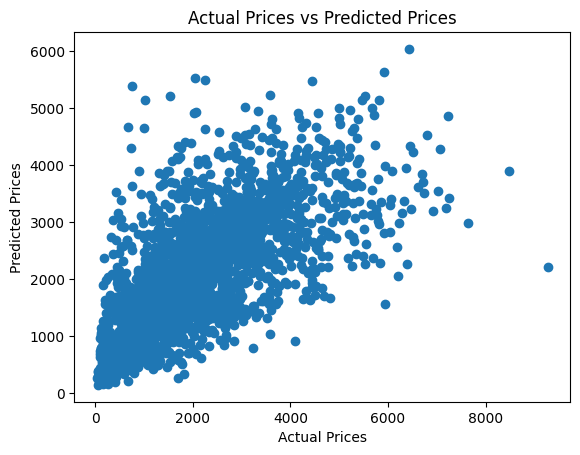

In [43]:
import matplotlib.pyplot as plt
plt.scatter(y_test_dropped, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()